<a href="https://colab.research.google.com/github/JAYASHREEUSHA/AIML_Projects/blob/main/PR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# Load dataset
df = pd.read_csv("social_media_vs_productivity.csv")
print(df.head())
# Clean and encode
features = [
    "daily_social_media_time", "number_of_notifications", "work_hours_per_day",
    "perceived_productivity_score", "actual_productivity_score",
    "stress_level", "sleep_hours"
]

df = df[features + ["job_satisfaction_score"]].dropna()

def classify(score):
    if score < 4:
        return "Low"
    elif score < 7:
        return "Medium"
    else:
        return "High"

df["satisfaction_class"] = df["job_satisfaction_score"].apply(classify)
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["satisfaction_class"])
class_names = label_encoder.classes_

X = df[features].values
y = df["label"].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


   age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368                   5.16

📊 PCA + RandomForest
Accuracy: 0.6755290287574607
Report:
               precision    recall  f1-score   support

        High       0.63      0.53      0.57       713
         Low       0.75      0.75      0.75      1293
      Medium       0.64      0.68      0.66      1680

    accuracy                           0.68      3686
   macro avg       0.67      0.65      0.66      3686
weighted avg       0.68      0.68      0.67      3686



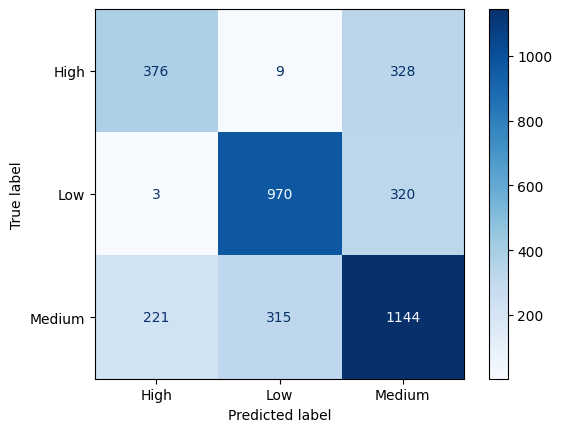

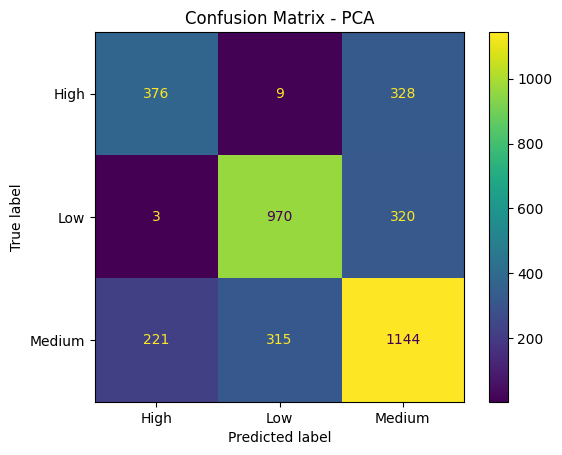

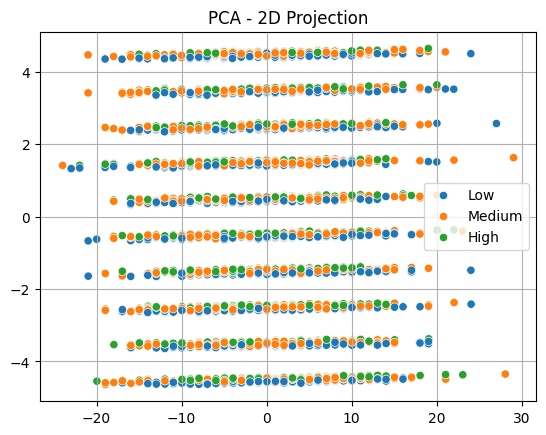

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print("📊 PCA + RandomForest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, cmap="Blues").plot()
plt.title("Confusion Matrix - PCA")
plt.show()

sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=label_encoder.inverse_transform(y_test))
plt.title("PCA - 2D Projection")
plt.grid(True)
plt.show()


📊 LDA + LogisticRegression
✅ Test Accuracy: 0.7863340563991323

📋 Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.71      0.73       178
         Low       0.83      0.86      0.85       324
      Medium       0.77      0.76      0.76       420

    accuracy                           0.79       922
   macro avg       0.78      0.78      0.78       922
weighted avg       0.79      0.79      0.79       922



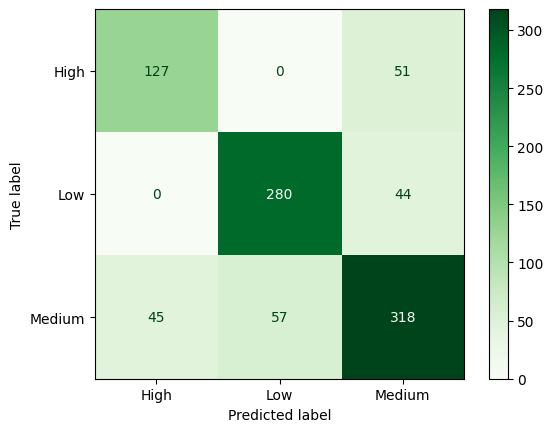

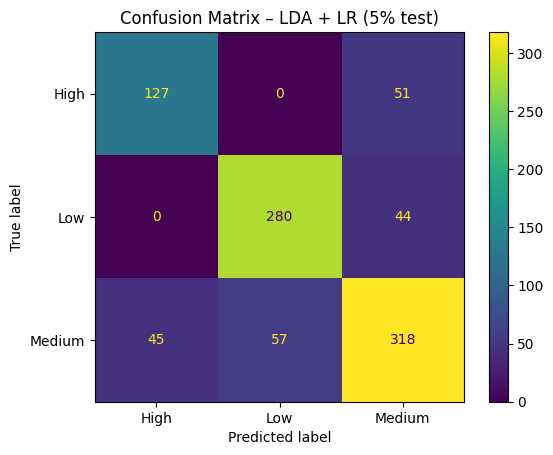

📈 Overfit Training Accuracy: 0.7599108876956472


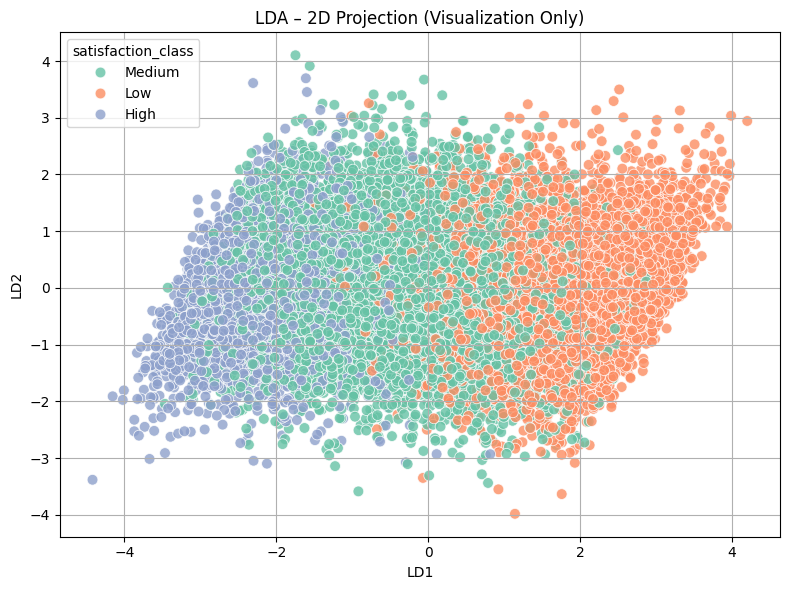

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute LDA projection (2 components)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)  # X, y already defined

# 2. Split with only 5% held out for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, stratify=y, test_size=0.05, random_state=42)

# 3. Hyperparameter tuning for LogisticRegression on LDA features
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_

# 4. Evaluate on the small test set
y_pred = best_lr.predict(X_test)
print("📊 LDA + LogisticRegression")
#print("Best C:", grid.best_params_['C'], "solver:", grid.best_params_['solver'])
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names, cmap="Greens"
).plot()
plt.title("Confusion Matrix – LDA + LR (5% test)")
plt.show()

# 5. (Optional) Overfit demo – measure training accuracy
y_train_pred = best_lr.predict(X_train)
print("📈 Overfit Training Accuracy:", accuracy_score(y_train, y_train_pred))

# 6. Visualization – 2D LDA scatter
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_lda[:, 0], y=X_lda[:, 1],
    hue=df["satisfaction_class"], palette="Set2", s=60, alpha=0.8
)
plt.title("LDA – 2D Projection (Visualization Only)")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.grid(True); plt.tight_layout()
plt.show()



📊 MDS (Subset) + Random Forest
Accuracy: 0.39
Report:
               precision    recall  f1-score   support

        High       0.27      0.20      0.23        20
         Low       0.32      0.21      0.25        33
      Medium       0.44      0.60      0.51        47

    accuracy                           0.39       100
   macro avg       0.34      0.34      0.33       100
weighted avg       0.37      0.39      0.37       100



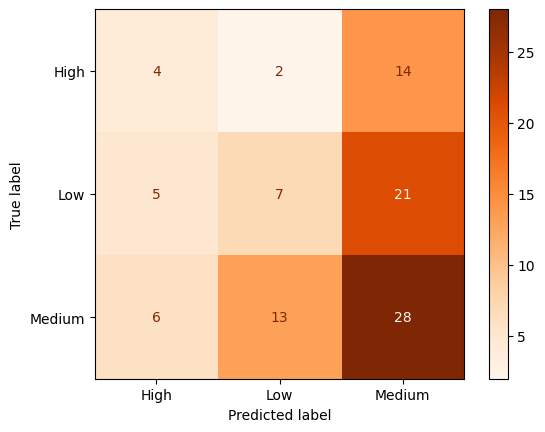

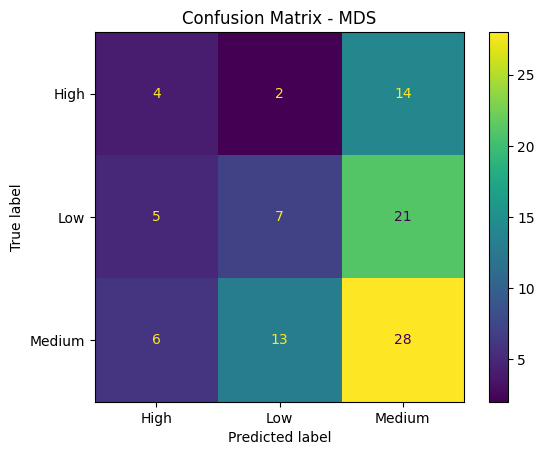

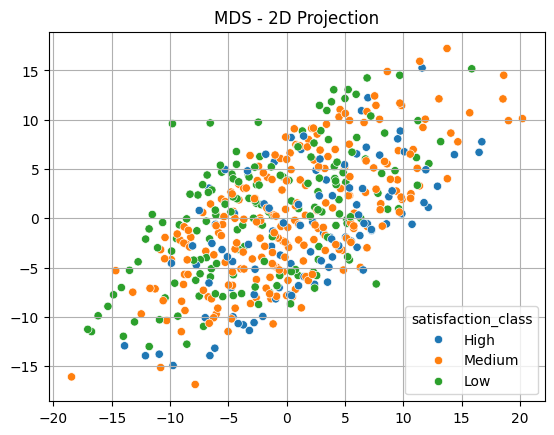

In [ ]:
from sklearn.manifold import MDS

# Subset
df_subset = df.sample(n=500, random_state=42)
X_small = df_subset[features].values
y_small = df_subset["label"].values

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_small)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_mds, y_small, stratify=y_small, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\n📊 MDS (Subset) + Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, cmap="Oranges").plot()
plt.title("Confusion Matrix - MDS")
plt.show()

# Scatter plot
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=df_subset["satisfaction_class"])
plt.title("MDS - 2D Projection")
plt.grid(True)
plt.show()



📊 LLE (Subset) + Random Forest
Accuracy: 0.38
Report:
               precision    recall  f1-score   support

        High       0.28      0.25      0.26        20
         Low       0.31      0.27      0.29        33
      Medium       0.45      0.51      0.48        47

    accuracy                           0.38       100
   macro avg       0.35      0.34      0.34       100
weighted avg       0.37      0.38      0.37       100



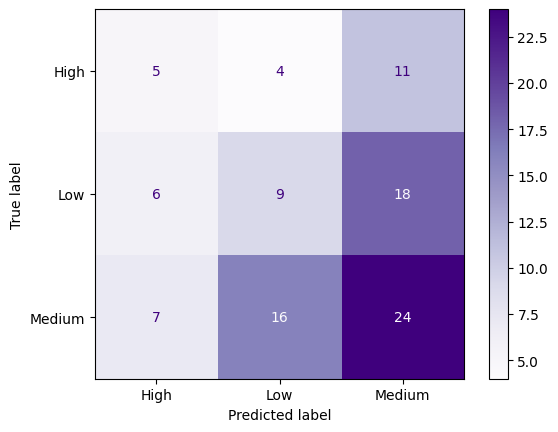

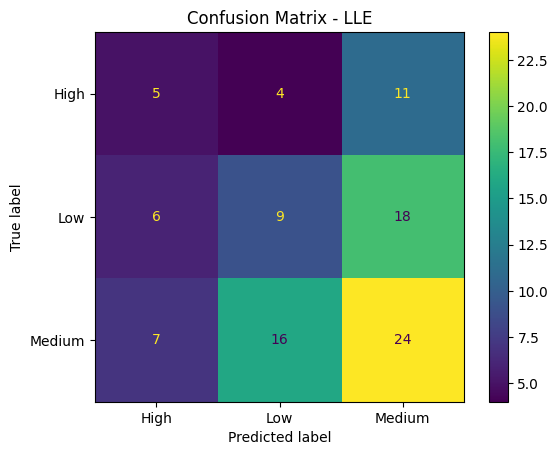

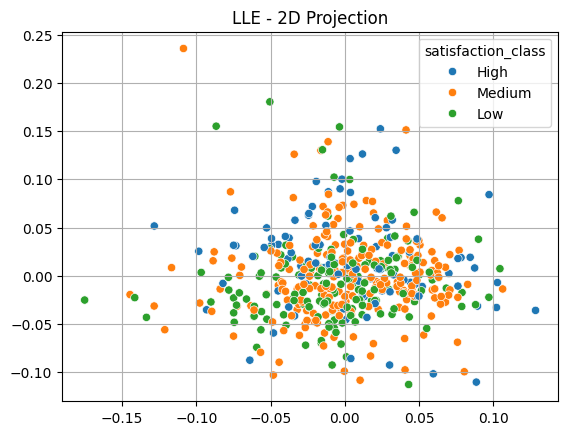

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# Subset
df_subset = df.sample(n=500, random_state=42)
X_small = df_subset[features].values
y_small = df_subset["label"].values

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_small)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_lle, y_small, stratify=y_small, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\n📊 LLE (Subset) + Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, cmap="Purples").plot()
plt.title("Confusion Matrix - LLE")
plt.show()

# Scatter plot
sns.scatterplot(x=X_lle[:, 0], y=X_lle[:, 1], hue=df_subset["satisfaction_class"])
plt.title("LLE - 2D Projection")
plt.grid(True)
plt.show()
